In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
female_data = pd.read_excel(r'女胎.xlsx')
female_data.columns

Index(['序号', '孕妇代码', '年龄', '身高', '体重', '末次月经', 'IVF妊娠', '检测日期', '检测抽血次数',
       '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数', 'GC含量',
       '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Unnamed: 20',
       'Unnamed: 21', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
       '被过滤掉读段数的比例', '染色体的非整倍体', '怀孕次数', '生产次数', '胎儿是否健康'],
      dtype='object')

In [63]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


In [64]:
female_data['染色体的非整倍体'] = female_data['染色体的非整倍体'].apply(lambda x: 1 if pd.notna(x) and x != '' else 0)

In [65]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,0,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,0,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,0,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,0,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,0,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,1,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,0,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,0,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,0,≥3,1,是


In [66]:
import re

def extract_week(x):

    if '+' in x:
   
        week_number = int(re.findall(r'\d+', x)[0])  # 提取 'w' 前面的数字
        extra_days = int(re.findall(r'\d+', x.split('+')[1])[0])  # 提取 '+' 后面的数字
        return week_number + extra_days / 7
    else:
 
        return int(re.findall(r'\d+', x)[0])


female_data['检测孕周'] = female_data['检测孕周'].apply(extract_week)


In [67]:
female_data.isnull().sum()

序号                0
孕妇代码              0
年龄                0
身高                0
体重                0
末次月经              0
IVF妊娠             0
检测日期              0
检测抽血次数            0
检测孕周              0
孕妇BMI             1
原始读段数             0
在参考基因组上比对的比例      0
重复读段的比例           0
唯一比对的读段数          0
GC含量              0
13号染色体的Z值         0
18号染色体的Z值         0
21号染色体的Z值         0
X染色体的Z值           0
Unnamed: 20     605
Unnamed: 21     605
X染色体浓度            0
13号染色体的GC含量       0
18号染色体的GC含量       0
21号染色体的GC含量       0
被过滤掉读段数的比例        0
染色体的非整倍体          0
怀孕次数              0
生产次数              0
胎儿是否健康            0
dtype: int64

In [68]:
female_data['孕妇BMI'] = pd.to_numeric(female_data['孕妇BMI'], errors='coerce')

# 方法 1：使用最频繁的日期填补
mean_value = female_data['孕妇BMI'].mean()  # 找到最常见的日期
female_data['孕妇BMI'] = female_data['孕妇BMI'].fillna(mean_value)
print(female_data['孕妇BMI'].isnull().sum())

0


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 选择相关特征和标签（假设 13号、18号、21号的非整倍体结果为目标变量）
X = female_data[['孕妇BMI', '检测孕周', '体重', '重复读段的比例', '唯一比对的读段数']]
y = female_data['染色体的非整倍体']
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
print(f"目标变量类别分布：\n{pd.Series(y).value_counts()}")

目标变量类别分布：
染色体的非整倍体
0    538
1     67
Name: count, dtype: int64


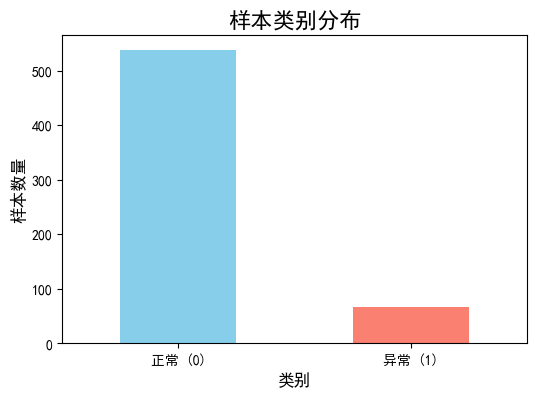

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设 'y' 是目标变量
y = female_data['染色体的非整倍体']

# 绘制柱状图
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 设置标题和标签
plt.title('样本类别分布', fontsize=16)
plt.xlabel('类别', fontsize=12)
plt.ylabel('样本数量', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['正常 (0)', '异常 (1)'], rotation=0)

# 显示图表
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)

# 训练模型
lr_model.fit(X_train, y_train)

# 预测
y_pred_lr = lr_model.predict(X_test)

# 输出评估结果
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       154
           1       0.00      0.00      0.00        28

    accuracy                           0.85       182
   macro avg       0.42      0.50      0.46       182
weighted avg       0.72      0.85      0.78       182

[[154   0]
 [ 28   0]]


C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [52]:
from sklearn.svm import SVC

# 初始化支持向量机模型
svm_model = SVC(kernel='rbf', probability=True)

# 训练模型
svm_model.fit(X_train, y_train)

# 预测
y_pred_svm = svm_model.predict(X_test)

# 输出评估结果
print("SVM Report")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

SVM Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       154
           1       0.00      0.00      0.00        28

    accuracy                           0.85       182
   macro avg       0.42      0.50      0.46       182
weighted avg       0.72      0.85      0.78       182

[[154   0]
 [ 28   0]]


C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [53]:
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_model.fit(X_train, y_train)

# 预测
y_pred_dt = dt_model.predict(X_test)

# 输出评估结果
print("Decision Tree Report")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       154
           1       0.20      0.07      0.11        28

    accuracy                           0.81       182
   macro avg       0.52      0.51      0.50       182
weighted avg       0.75      0.81      0.77       182

[[146   8]
 [ 26   2]]


In [54]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 输出评估结果
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       154
           1       0.00      0.00      0.00        28

    accuracy                           0.85       182
   macro avg       0.42      0.50      0.46       182
weighted avg       0.72      0.85      0.78       182

[[154   0]
 [ 28   0]]


C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [55]:
from sklearn.naive_bayes import GaussianNB

# 初始化朴素贝叶斯模型
nb_model = GaussianNB()

# 训练模型
nb_model.fit(X_train, y_train)

# 预测
y_pred_nb = nb_model.predict(X_test)

# 输出评估结果
print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       154
           1       0.00      0.00      0.00        28

    accuracy                           0.85       182
   macro avg       0.42      0.50      0.46       182
weighted avg       0.72      0.85      0.78       182

[[154   0]
 [ 28   0]]


C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [56]:
from sklearn.ensemble import AdaBoostClassifier

# 初始化AdaBoost模型
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# 训练模型
ada_model.fit(X_train, y_train)

# 预测
y_pred_ada = ada_model.predict(X_test)

# 输出评估结果
print("AdaBoost Report")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))


AdaBoost Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       154
           1       0.00      0.00      0.00        28

    accuracy                           0.85       182
   macro avg       0.42      0.50      0.46       182
weighted avg       0.72      0.85      0.78       182

[[154   0]
 [ 28   0]]


C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\23163\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 计算特征与目标变量之间的 Spearman 相关系数
spearman_corr = female_data[['年龄', '身高', '体重',
       '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数', 'GC含量',
       '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
       '被过滤掉读段数的比例']].apply(lambda x: spearmanr(x, female_data['染色体的非整倍体'])[0])

# 输出特征与目标变量之间的 Spearman 相关系数
print(f"Spearman 相关系数：\n{spearman_corr}")

Spearman 相关系数：
年龄             -0.057080
身高             -0.045851
体重             -0.071515
检测孕周            0.064055
孕妇BMI          -0.034411
原始读段数          -0.013481
在参考基因组上比对的比例    0.004313
重复读段的比例        -0.033627
唯一比对的读段数       -0.009621
GC含量           -0.022981
13号染色体的Z值      -0.040653
18号染色体的Z值       0.013179
21号染色体的Z值       0.055582
X染色体的Z值        -0.054948
X染色体浓度         -0.294134
13号染色体的GC含量     0.054828
18号染色体的GC含量     0.046685
21号染色体的GC含量    -0.000302
被过滤掉读段数的比例     -0.018185
dtype: float64


In [24]:
feature_columns_1 = ['年龄', '身高', '体重',
       '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数', 'GC含量',
       '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
       '被过滤掉读段数的比例', '染色体的非整倍体']

In [75]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13.714286,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,0,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17.142857,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,0,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19.857143,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,0,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23.000000,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,0,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12.714286,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,0,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23.142857,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,1,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15.000000,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,0,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15.571429,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,0,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19.571429,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,0,≥3,1,是


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 1. 数据加载和预处理
# 特征列和目标列
feature_columns = female_data[['孕妇BMI', '检测孕周', '重复读段的比例', '原始读段数', '体重']]  # 替换为实际的特征列名
target_column = female_data['染色体的非整倍体']  # 替换为目标列名

female_data[feature_columns] = female_data[feature_columns].apply(pd.to_numeric, errors='coerce')

# 处理缺失值，可以选择填充或删除
female_data.dropna(subset=feature_columns, inplace=True)

# 对特征列进行标准化
scaler = StandardScaler()
female_data[feature_columns] = scaler.fit_transform(female_data[feature_columns])

# 2. 数据分割
X = female_data[feature_columns]
y = female_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 模型初始化
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# 4. 训练并评估模型
results = []

for name, model in models.items():
    # 模型训练
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # 预测概率，用于AUC计算

    # 计算各类指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # 记录结果
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'AUC': auc_score,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# 5. 输出每个模型的评估结果
results_df = pd.DataFrame(results)

# 打印评估结果
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']])

# 6. 可视化 ROC 曲线
plt.figure(figsize=(10, 6))

for result in results:
    fpr, tpr, _ = roc_curve(y_test, result['Model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{result['Model']} (AUC = {result['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# 7. 计算 Spearman 相关性系数
for group, data in female_data.groupby('BMI_group'):  # 根据BMI分组
    corr, p_val = spearmanr(data[feature_columns], data[target_column])  # 计算相关性和p值
    print(f"\nBMI组别: {group} 的相关性系数和p值：")
    print(f"Spearman Correlation: {corr}")
    print(f"p-value: {p_val}")

ValueError: Boolean array expected for the condition, not float64